### Many-body Entanglement and Tensor Networks
Tutorials based on the 2017 Perimeter Scholar International Condensed Matter Review course taught by Guifre Vidal

# <span style="color:#0C45A9">Python tutorial 5</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 5.1. Entanglement and correlations

### 5.1.1. Computing entanglement entropy

Define function to calculate entropy from the density matrix eigenvalues (probabilities)

In [2]:
def entanglement_entropy_from_p(p):
    entropy = np.sum(np.array([-p_i*np.log2(p_i) for p_i in p if p_i > 0]))
    return entropy

Compute sequence of entangement entropy and spectrum for $\psi$ at different bi-partitions. There are only $N//2$ partitions because of symmetry arguments.

In [3]:
def entropies_and_spectra_from_psi(Psi):
    L = len(Psi)  # Dimension of the vector space
    N = round(np.log2(L))  # Number of sites
    p = N//2 # N/2 or (N-1)/2 partitions -> 2**p is the most number of eigenvalues rho can have
    EE = np.zeros(p) #entanglement entropy
    ES = np.zeros((2**p, p)) #entanglement spectrum
    for n in range(1,p+1):
        M = np.reshape(Psi, (2**(n),2**(N-n))) #partition into 2 subsystems to create matrix
        rho = M.dot(M.conj().T) #reduced density matrix
        p, U = np.linalg.eig(rho) #obtain eivenvalues p_i
        p = np.real(p) # to remove imaginary parts
        p_sorted = -np.sort(-p) #sort
        #fill with zeros to get size 2**(N//2)
        pad_w = 2**(N//2)-2**n 
        p = np.pad(p, (0, pad_w), 'constant')
        #store
        ES[:,n-1] = p  
        EE[n-1] = entanglement_entropy_from_p(p)
    return ES,EE

### 5.1.2. Computing correlations

Define function to compute the two-point correlator:
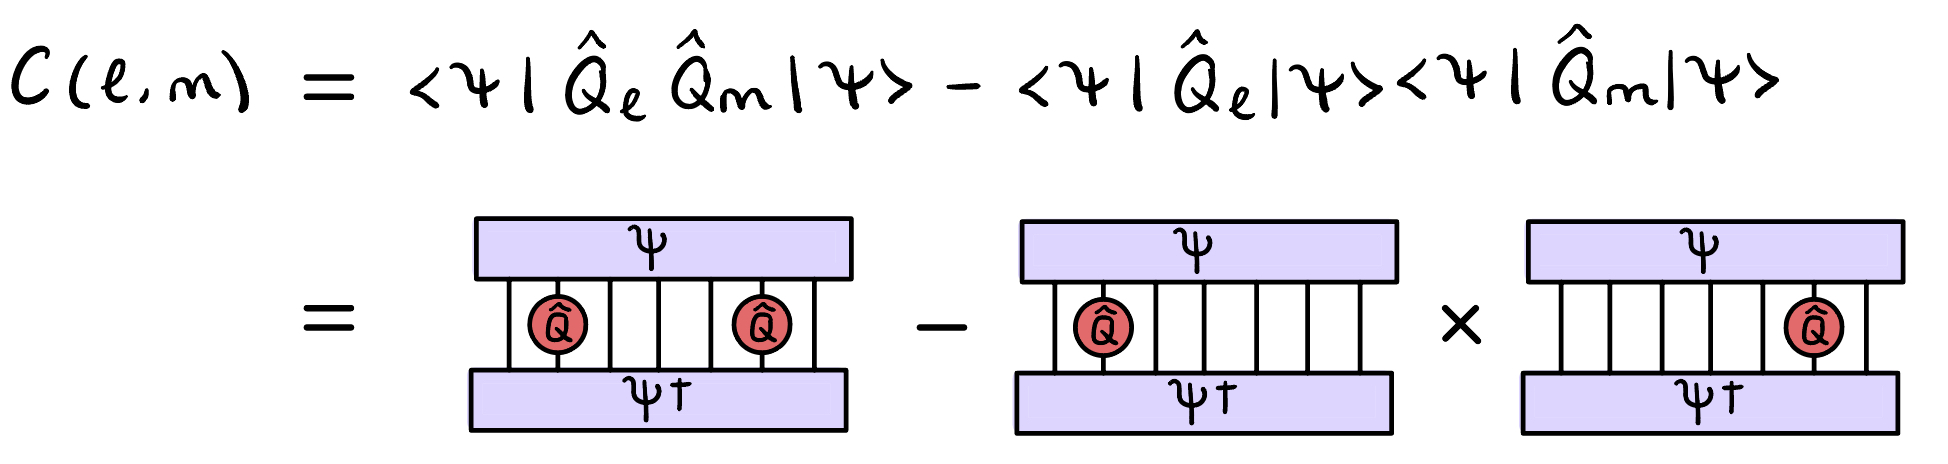

In [4]:
def compute_correlator(Psi,Q): #Q has to be a 2x2 matrix
    L = len(Psi)  # Dimension of the vector space
    N = round(np.log2(L))  # Number of sites
    Corr = np.zeros(N-1)
    PsiY = np.reshape(Psi, (2,2**(N-1)))
    PsiY = Q.dot(PsiY)
    Y = np.reshape(PsiY, L)
    Y = Psi.conj().T.dot(Y)
    for n in range(N-1):
        PsiY = np.reshape(PsiY, (2, 2**(N-1)))
        Psi0 = np.reshape(Psi, (2, 2**(N-1)))     
        PsiY = PsiY.T
        Psi0 = Psi0.T
        
        PsiXY = np.reshape(PsiY,(2,2**(N-1)))
        PsiXY = Q.conj().T.dot(PsiXY)
        PsiXY = np.reshape(PsiXY,L) #first term
        bra = np.reshape(Psi0,(1,L))
        XY = (bra.dot(PsiXY))[0]
        PsiX = np.reshape(Psi0,(2,2**(N-1)))
        PsiX = Q.dot(PsiX)
        PsiX = np.reshape(PsiX, L)
        X = (bra.dot(PsiX))[0]

        Corr[n] = np.abs(XY - X.conj()*Y)
        
    return Corr

### 5.1.3. Random $N$ qubit state

#### 5.1.3.1. Entanglement in random $N$ qubit state

Generate a random state of $N$ qubits. We will see that the entropy of this random state is almost maximal. Maximal entropy occurs when:<br>
<br>
<center>$p_i =(\frac{1}{\dim(\mathcal{H})},\frac{1}{\dim(\mathcal{H})},...)$ and it is $S_{max}=\log_2(\dim{\mathcal{H}})= \log_2(2^N)=N$. <center>

In [5]:
N=20

Psi = np.random.normal(size = 2**N)+1j*np.random.normal(size = 2**N)
Psi = Psi/np.linalg.norm(Psi)

Let's first check the entropy of, for example, the first 3 spins:

In [6]:
N_entropy = 3

#reshape state and compute rho
M = np.reshape(Psi, (2**N_entropy, 2**(N-N_entropy)))
rho = M.dot(M.conj().T)
#obtain eigenvalues p_i
p, U = np.linalg.eig(rho) 
p = np.real(p)

ent_entropy = entanglement_entropy_from_p(p)
print("Entanglement entropy for the first 3 qubits:", ent_entropy)

Entanglement entropy for the first 3 qubits: 2.999944206924588


Let's do this now for all system partitions:

In [7]:
ent_spectra_rand, ent_entropy_rand = entropies_and_spectra_from_psi(Psi)

Check that each spectra adds up to 1.

In [8]:
for i in range(np.shape(ent_spectra_rand)[1]):
    if not np.allclose(1,np.sum(ent_spectra_rand[:,i])):
        print("At least one of the spectra doesn't add up to 1.")

Plot spectrum for one partition. Let's do it for the last one since it will have the most number of $\rho$ eigenvalues.

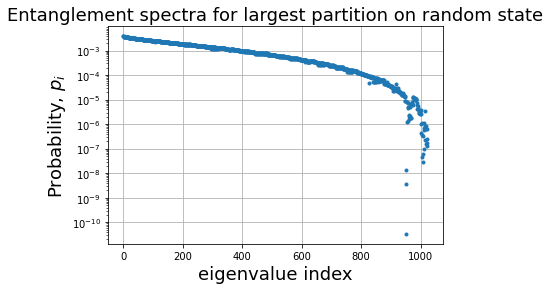

In [9]:
plt.title("Entanglement spectra for largest partition on random state", fontsize=18)
plt.grid()
plt.xlabel("eigenvalue index",fontsize=18)
plt.ylabel(r"Probability, $p_i$",fontsize=18)
plt.yscale("log")
plt.plot(ent_spectra_rand[:,-1], ".")
plt.show()

Plot spectra for all partitions.

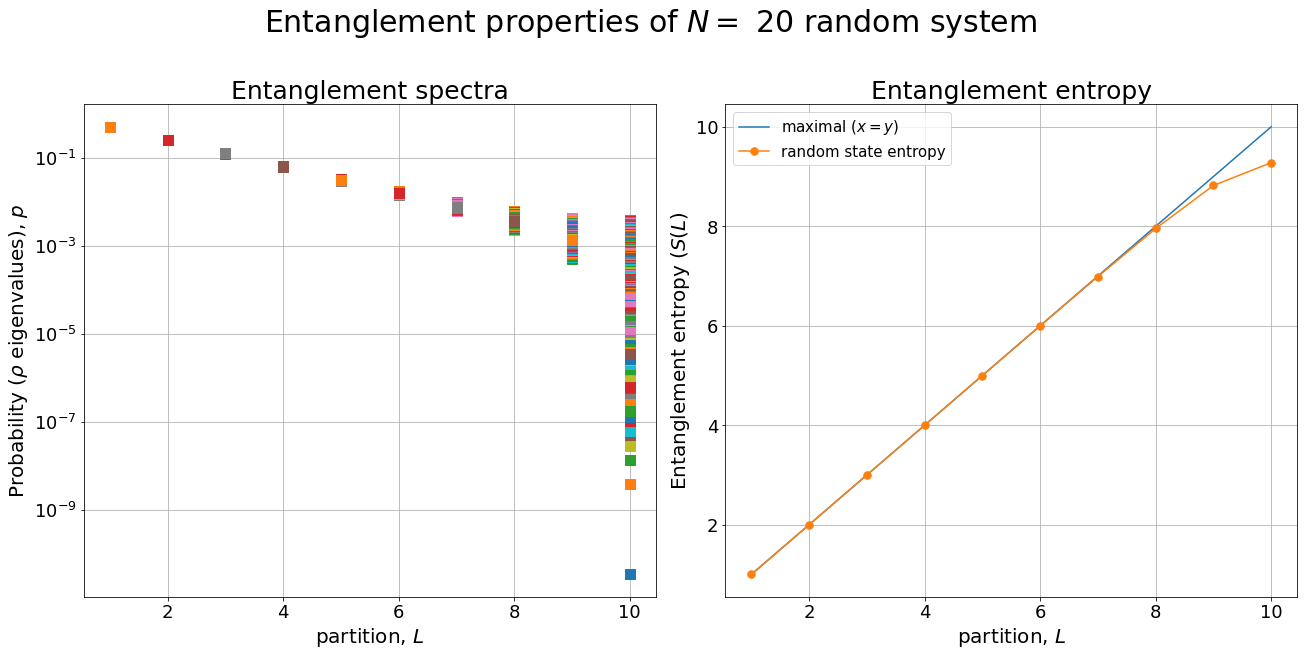

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained", figsize=(18, 9))

fig.suptitle(r'Entanglement properties of $N=$ '+ str(N)+' random system'+' \n', fontsize=30)
ax1.set_xlabel(r"partition, $L}$", fontsize=20)
ax2.set_xlabel(r"partition, $L}$", fontsize=20)

ax1.set_ylabel(r"Probability ($\rho$ eigenvalues), $p$", fontsize=20)
ax2.set_ylabel(r"Entanglement entropy ($S(L)$", fontsize=20)
ax1.set_title(r'Entanglement spectra', fontsize=25)
ax2.set_title(r'Entanglement entropy', fontsize=25)
ax1.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)
ax1.grid()
ax2.grid()

ax1.set_yscale('log')
for i in range(np.shape(ent_spectra_rand)[0]):
    ax1.plot(np.arange(1,N//2+1), ent_spectra_rand[i,:], "s", ms=10)

ax2.plot(np.arange(1,N//2+1),np.arange(1,N//2+1), label=r'maximal ($x=y$)')
ax2.plot(np.arange(1,N//2+1), ent_entropy_rand, ".", ls='-', ms=15, label = 'random state entropy')
ax2.legend(fontsize=15)

#### Entropy is almost maximal!

#### 5.1.3.2. Correlations in random $N$ qubit state

In [11]:
Q = np.array([[0,1],[1,0]])

corr_rand = compute_correlator(Psi, Q)

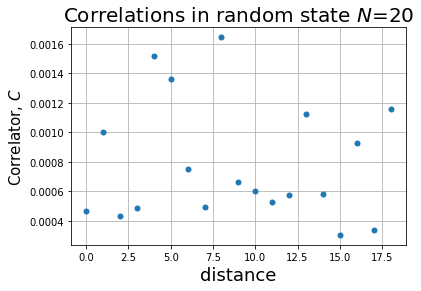

In [12]:
plt.title("Correlations in random state $N$=" +str(N), fontsize=20)
plt.grid()
plt.xlabel("distance",fontsize=18)
plt.ylabel(r"Correlator, $C$",fontsize=15)
plt.plot(corr_rand, ".", ms=10)
plt.show()

### 5.1.4. Ground $N$ qubit state

#### 5.1.4.1. Entanglement in ground state

Load data for ground-state:

In [13]:
import os
import h5py
cwd = os.getcwd()
data_path = os.path.join(cwd, "data/GroundStateIsingN20h1.jld")

file = h5py.File(data_path, "r")
Psi_data = file.get('Psi')
E_data = file.get('E')[0]
Psi = np.array(Psi_data)
Psi = Psi[0]
print("Shape of Psi:", np.shape(Psi))
N = round(np.log2(len(Psi)))
print("N =",N)

Shape of Psi: (1048576,)
N = 20


In [14]:
Psi = np.array([Psi[i]['re_']+1j*Psi[i]['im_'] for i in range(len(Psi))])

In [15]:
ent_spectra_gs, ent_entropy_gs = entropies_and_spectra_from_psi(Psi)

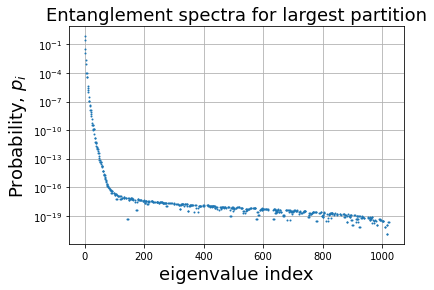

In [16]:
plt.title("Entanglement spectra for largest partition", fontsize=18)
plt.grid()
plt.xlabel("eigenvalue index",fontsize=18)
plt.ylabel(r"Probability, $p_i$",fontsize=18)
plt.yscale("log")
plt.plot(ent_spectra_gs[:,-1], ".", ms=2)
plt.show()

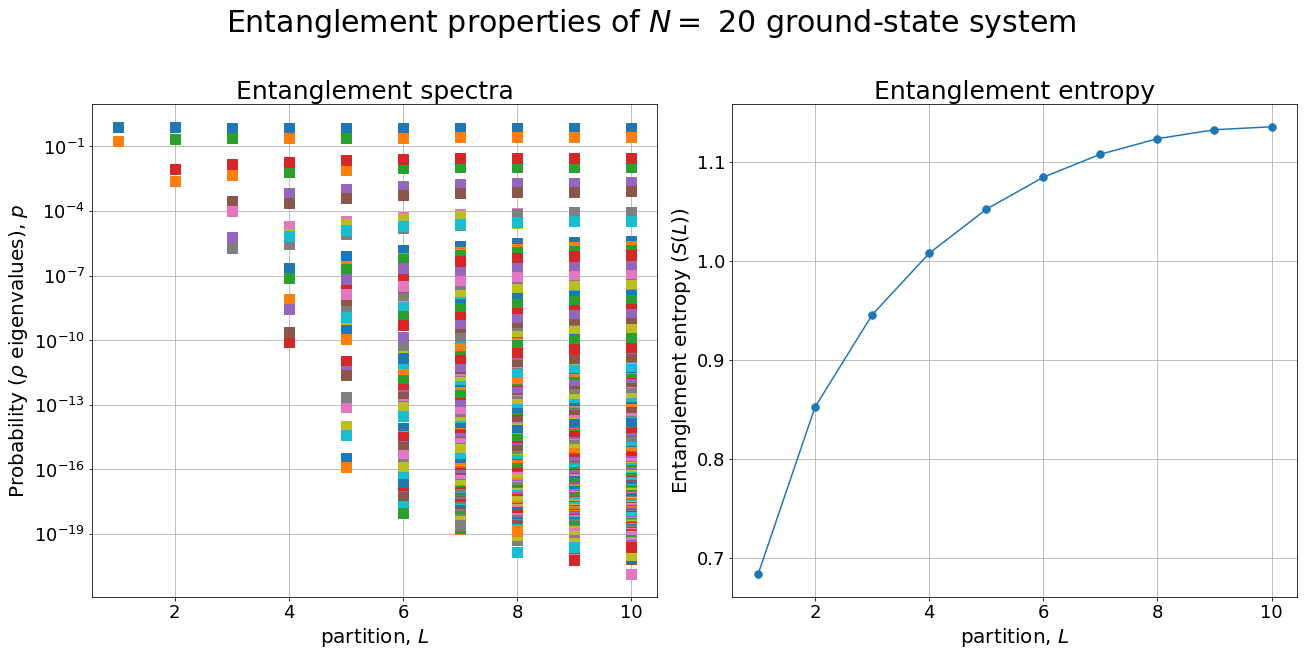

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained", figsize=(18, 9))

fig.suptitle(r'Entanglement properties of $N=$ '+ str(N)+' ground-state system'+' \n', fontsize=30)
ax1.set_xlabel(r"partition, $L$", fontsize=20)
ax2.set_xlabel(r"partition, $L$", fontsize=20)

ax1.set_ylabel(r"Probability ($\rho$ eigenvalues), $p$", fontsize=20)
ax2.set_ylabel(r"Entanglement entropy ($S(L))$", fontsize=20)
ax1.set_title(r'Entanglement spectra', fontsize=25)
ax2.set_title(r'Entanglement entropy', fontsize=25)
ax1.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)
ax1.grid()
ax2.grid()

ax1.set_yscale('log')
for i in range(np.shape(ent_spectra_gs)[0]):
    ax1.plot(np.arange(1,N//2+1), ent_spectra_gs[i,:], "s", ms=10)

ax2.plot(np.arange(1,N//2+1), ent_entropy_gs, ".", ls='-', ms=15)

#### Theoretical CFT prediction

As we expected for a ground-state system, the entanglement structure is much different. We will compare this against CFT entanglement predictions for ground-states:
<center>
    $S(L)=\frac{c}{2}\,\log_2\left(\frac{N}{\pi}sin\left(\frac{L\pi}{N}\right)\right)+c_1$
<center>
<p align = 'left'> We will work with the entropy difference from $L=1$ (first partition).

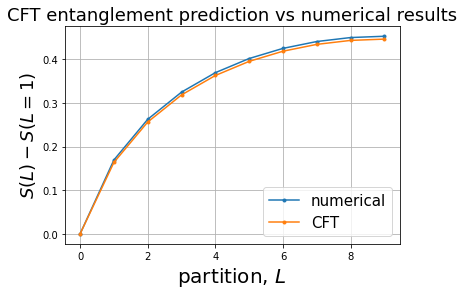

In [18]:
cft_ent_entropy = [1/6*(np.log2(N/np.pi*np.sin(n*np.pi/N))-np.log2(N/np.pi*np.sin(np.pi/N))) for n in range (1,N//2+1)]
plt.title("CFT entanglement prediction vs numerical results", fontsize=18)
plt.grid()
plt.xlabel(r"partition, $L$", fontsize=20)
plt.ylabel(r"$S(L)-S(L=1)$",fontsize=18)
plt.plot(ent_entropy_gs-ent_entropy_gs[0], ".", ls='-', label = "numerical")
plt.plot(cft_ent_entropy, ".", ls='-', label = "CFT")
plt.legend(fontsize=15)
plt.show()

#### 5.1.4.2. Correlations in ground state

In [19]:
Q = np.array([[0,1],[1,0]])

corr_gs = compute_correlator(Psi, Q)

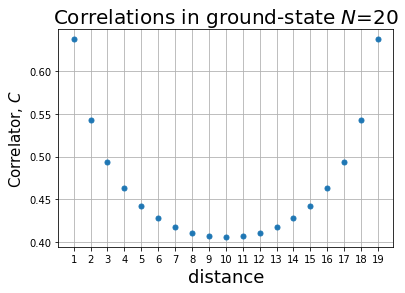

In [20]:
plt.title("Correlations in ground-state $N$=" +str(N), fontsize=20)
plt.grid()
plt.xlabel("distance",fontsize=18)
plt.ylabel(r"Correlator, $C$",fontsize=15)
plt.xticks(np.arange(1,N))
plt.plot(np.arange(1,N), corr_gs, ".", ms=10)
plt.show()

Two-point correlations decay as $\sim \frac{1}{x^{2\Delta}}$, where, for the Ising model: $\Delta=1/8$. Let's check this on the same plot:

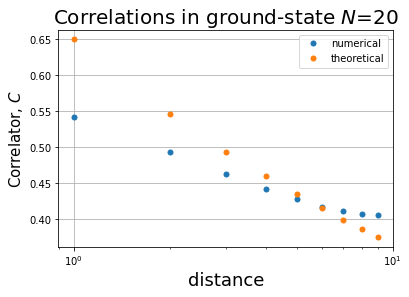

In [21]:
plt.title("Correlations in ground-state $N$=" +str(N), fontsize=20)
plt.grid()
#plt.yscale("log")
plt.xscale("log")
plt.xlabel("distance",fontsize=18)
plt.ylabel(r"Correlator, $C$",fontsize=15)
plt.plot(corr_gs[0:N//2], ".", ms=10, label='numerical')
plt.plot(np.arange(1,N/2), 0.65*(np.arange(1,N/2)**(-1/4)),".", ms=10, label='theoretical')
plt.legend()
plt.show()

### 5.1.5. Ground vs random $N$ qubit state comparison

#### 5.1.5.1. Entanglement entropy

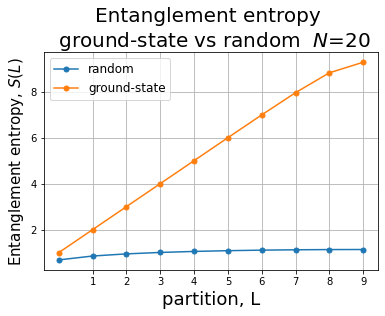

In [22]:
plt.title("Entanglement entropy \n ground-state vs random  $N$=" +str(N), fontsize=20)
plt.grid()
plt.xlabel("partition, L",fontsize=18)
plt.ylabel(r"Entanglement entropy, $S(L)$",fontsize=15)
plt.xticks(np.arange(1,N//2+1))
plt.plot(ent_entropy_gs, ".", ms=10, ls = '-', label='random')
plt.plot(ent_entropy_rand, ".", ms=10, ls = '-', label='ground-state')
plt.legend(fontsize=12)
plt.show()

#### 5.1.5.2. Entanglement spectrum

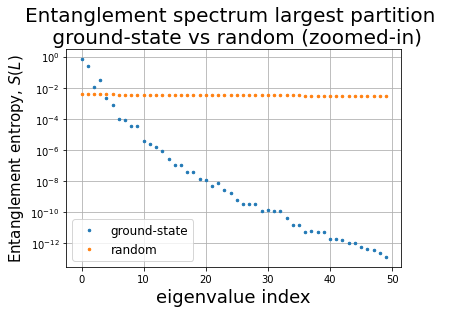

In [23]:
plt.title("Entanglement spectrum largest partition \n ground-state vs random (zoomed-in)", fontsize=20)
plt.grid()
plt.xlabel("eigenvalue index",fontsize=18)
plt.ylabel(r"Entanglement entropy, $S(L)$",fontsize=15)
plt.yscale("log")
plt.plot(ent_spectra_gs[0:50,-1], ".", ms=5, label='ground-state')
plt.plot(ent_spectra_rand[0:50,-1], ".", ms=5, label='random')

plt.legend(fontsize=12)
plt.show()

#### 5.1.5.3. Entanglement entropy

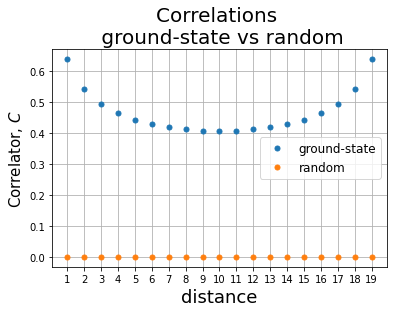

In [24]:
plt.title("Correlations \n ground-state vs random", fontsize=20)
plt.grid()
plt.xlabel("distance",fontsize=18)
plt.ylabel(r"Correlator, $C$",fontsize=15)
plt.xticks(np.arange(1,N))
plt.plot(np.arange(1,N), corr_gs, ".", ms=10, label='ground-state')
plt.plot(np.arange(1,N), corr_rand, ".", ms=10, label='random')
plt.legend(fontsize=12)
plt.show()